# Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_04.ipynb)

This lab will help you solidify your understanding of working with `NumPy`, `Pandas`, and `GeoPandas` for geospatial data analysis. Through these exercises, you will perform data manipulation, spatial analysis, and visualizations by combining these powerful libraries.

## Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [1]:
import numpy as np
import pandas as pd

In [2]:
arr_2d = np.array(
    [35.6895, 139.6917, 40.7128, -74.0060, 51.5074, -0.1278, 48.8566, 2.3522]
).reshape(4, 2)
arr_2d

array([[ 3.568950e+01,  1.396917e+02],
       [ 4.071280e+01, -7.400600e+01],
       [ 5.150740e+01, -1.278000e-01],
       [ 4.885660e+01,  2.352200e+00]])

In [3]:
arr_radians = np.radians(arr_2d)
print(f"Array in Radians:\n{arr_radians}")

Array in Radians:
[[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]


In [4]:
tokyo = arr_radians[:1, :]
tokyo

array([[0.62289928, 2.4380801 ]])

In [5]:
differences = arr_radians - tokyo
print(f"Differences from Tokyo:\n{differences}")

Differences from Tokyo:
[[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [6]:
world_cities = pd.read_csv(
    "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
)
world_cities.head(5)

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [7]:
# greater than 1 million cities
world_cities_large = world_cities[world_cities["population"] > 1000000]
world_cities_large

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [10]:
world_cities_grouping = (
    world_cities.groupby("country").agg({"population": "sum"}).reset_index()
)
world_cities_grouping

,country,population
0,AFG,4931702
1,AGO,6821544
2,ALB,895350
3,ALD,10682
4,AND,53998
...,...,...
195,WSM,61916
196,YEM,3759000
197,ZAF,13373789
198,ZMB,2326947


In [12]:
# alternative way to group by country and sum population
world_cities.groupby("country")["population"].sum().sort_values(ascending=False)

country
CHN    217132049
USA    156465416
IND    154810226
BRA     80794236
JPN     65779390
         ...    
TUV         4749
FSM         4645
ATA         3787
VAT          832
SAH          500
Name: population, Length: 200, dtype: int64

In [9]:
world_cities.sort_values(by="population", ascending=False, inplace=True)
world_cities.head(10)

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


## Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ny_buildings = gpd.read_file(
    "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
)
ny_buildings.head(5)

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


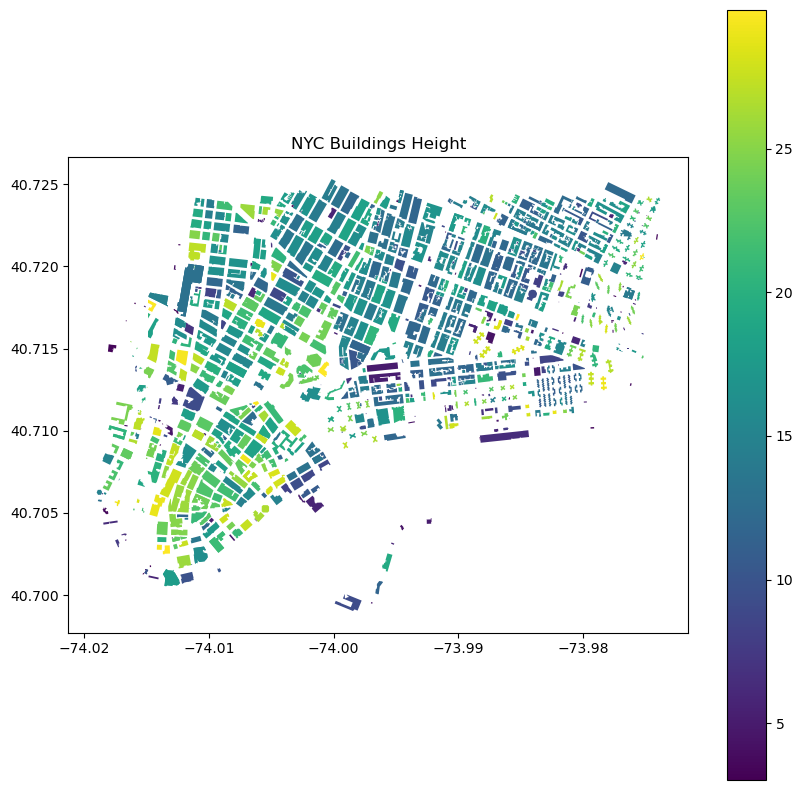

In [11]:
ny_buildings.plot(column="height_MS", cmap="viridis", legend=True, figsize=(10, 10))
plt.title("NYC Buildings Height")
plt.show()

In [12]:
ny_buildings.explore("height_MS", legend=True)

In [7]:
# average height of buildings
average_height = ny_buildings["height_MS"].mean()
print(f"Average height of buildings in NYC: {average_height:.2f} meters")

Average height of buildings in NYC: 15.45 meters


In [8]:
high_than_average = ny_buildings[ny_buildings["height_MS"] > average_height]
high_than_average

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."


In [10]:
high_than_average.to_file("nyc_buildings_higher_than_average.geojson", driver="GeoJSON")

## Exercise 4: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [31]:
world_cities = pd.read_csv(
    "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
)
world_cities.head(10)

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
5,6,Mariehamn,ALD,60.09700,19.94900,10682
6,7,Ramallah,PSE,31.90294,35.20621,24599
7,8,Vatican City,VAT,41.90001,12.44781,832
8,9,Poitier,FRA,46.58329,0.33328,85960
9,10,Clermont-Ferrand,FRA,45.77998,3.08001,233050


In [32]:
world_cities = world_cities[
    (world_cities["latitude"] > -40) & (world_cities["latitude"] < 60)
]

In [33]:
world_cities

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [34]:
gdf_world_cities = gpd.GeoDataFrame(
    world_cities,
    geometry=gpd.points_from_xy(world_cities["longitude"], world_cities["latitude"]),
)
gdf_world_cities.crs = "EPSG:3857"
gdf_world_cities.head(10)

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.533 0.583)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
6,7,Ramallah,PSE,31.90294,35.20621,24599,POINT (35.206 31.903)
7,8,Vatican City,VAT,41.90001,12.44781,832,POINT (12.448 41.9)
8,9,Poitier,FRA,46.58329,0.33328,85960,POINT (0.333 46.583)
9,10,Clermont-Ferrand,FRA,45.77998,3.08001,233050,POINT (3.08 45.78)
10,11,Besancon,FRA,47.23000,6.03001,128426,POINT (6.03 47.23)


In [35]:
gdf_world_cities = gdf_world_cities.set_index("name")
gdf_world_cities

,id,country,latitude,longitude,population,geometry
name,,,,,,
Bombo,1,UGA,0.58330,32.53330,75000,POINT (32.533 0.583)
Fort Portal,2,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
Potenza,3,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
Campobasso,4,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
Aosta,5,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...
Rio de Janeiro,1245,BRA,-22.92502,-43.22502,11748000,POINT (-43.225 -22.925)
Sao Paulo,1246,BRA,-23.55868,-46.62502,18845000,POINT (-46.625 -23.559)
Sydney,1247,AUS,-33.92001,151.18518,4630000,POINT (151.185 -33.92)


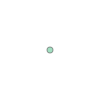

In [ ]:
paris = gdf_world_cities.loc["Paris", "geometry"]

In [38]:
gdf_world_cities["distance_to_paris"] = gdf_world_cities.distance(paris)
gdf_world_cities

,id,country,latitude,longitude,population,geometry,distance_to_paris
name,,,,,,,
Bombo,1,UGA,0.58330,32.53330,75000,POINT (32.533 0.583),56.950183
Fort Portal,2,UGA,0.67100,30.27500,42670,POINT (30.275 0.671),55.709612
Potenza,3,ITA,40.64200,15.79900,69060,POINT (15.799 40.642),15.778768
Campobasso,4,ITA,41.56300,14.65600,50762,POINT (14.656 41.563),14.324519
Aosta,5,ITA,45.73700,7.31500,34062,POINT (7.315 45.737),5.883188
...,...,...,...,...,...,...,...
Rio de Janeiro,1245,BRA,-22.92502,-43.22502,11748000,POINT (-43.225 -22.925),85.027136
Sao Paulo,1246,BRA,-23.55868,-46.62502,18845000,POINT (-46.625 -23.559),87.420565
Sydney,1247,AUS,-33.92001,151.18518,4630000,POINT (151.185 -33.92),170.324713


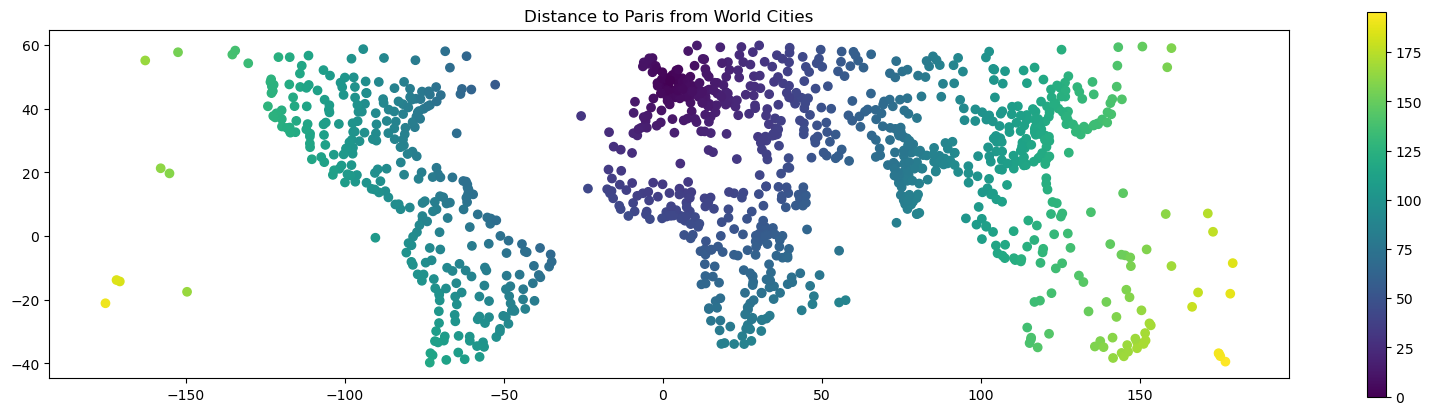

In [41]:
gdf_world_cities.plot(column="distance_to_paris", legend=True, figsize=(20, 5))
plt.title("Distance to Paris from World Cities")
plt.show()